In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import h5py
import re
# from scipy.optimize import minimize_scalar
from pathlib import Path
import re

In [3]:
plt.style.use(['science', 'notebook', 'grid'])

### Old Stuff

In [3]:
std_losses = np.array([4.430503986804979e-05, 4.478269629908027e-05, 0.004452916704118252, 0.006894785825163126, 0.01151146698743105, 0.014265298455953599, 0.019431227520108223, 0.0232204110622406, 0.028754968762397765, 0.033771392554044724, 0.039497384041547776, 0.04479576730728149, 0.05124129715561867, 0.05666950839757919, 0.06295847389520261, 0.06862739040313856, 0.07425264837710481, 0.08109224808216095, 0.08495048950521314, 0.09460839042638211, 0.09730494348332286, 0.10461533442139626, 0.11142176806926728])

true_MSE = std_losses * (0.17026729881763458 ** 2)
sqrt_MSE = np.sqrt(true_MSE)

dims = np.array(list(range(6, 51, 2)))

In [4]:
print(dims)
print(true_MSE)
print(sqrt_MSE)

[ 6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50]
[1.28444533e-06 1.29829305e-06 1.29094299e-04 1.99886412e-04
 3.33728399e-04 4.13564598e-04 5.63329805e-04 6.73181847e-04
 8.33633949e-04 9.79064856e-04 1.14506681e-03 1.29867199e-03
 1.48553404e-03 1.64290306e-03 1.82522616e-03 1.98957345e-03
 2.15265504e-03 2.35094156e-03 2.46279565e-03 2.74278740e-03
 2.82096305e-03 3.03289825e-03 3.23022325e-03]
[0.00113333 0.00113943 0.01136197 0.01413812 0.01826823 0.02033629
 0.02373457 0.02594575 0.02887272 0.03129001 0.03383884 0.03603709
 0.03854263 0.04053274 0.04272267 0.04460463 0.04639671 0.04848651
 0.04962656 0.05237163 0.05311274 0.05507176 0.05683505]


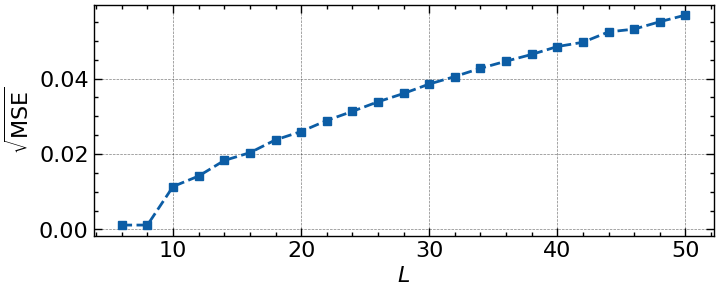

In [6]:
plt.figure(figsize=(8, 3))
plt.plot(dims, sqrt_MSE, '--s')
plt.xlabel("$L$")
plt.ylabel(r'$\sqrt{\text{MSE}}$')
plt.show()

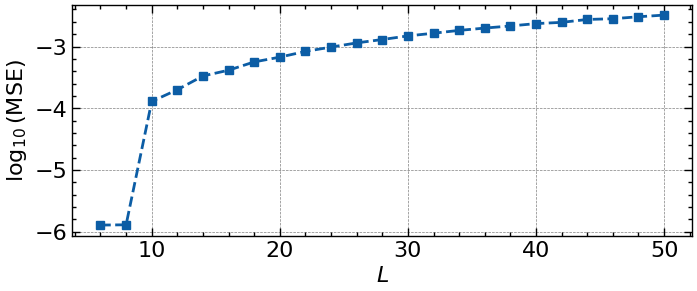

In [7]:
plt.figure(figsize=(8, 3))
plt.plot(dims, np.log10(true_MSE), '--s')
plt.xlabel("$L$")
plt.ylabel(r'$\log_{10}(\text{MSE})$')
plt.show()

In [3]:
std_losses = np.array([0.0006697124838829041, 0.0007646985407228823, 0.03908406617906359, 0.027529380425347222, 0.046277566415292244])

true_MSE = std_losses * (0.1748630404472351 ** 2)

dims = np.array(list(range(6, 19, 3)))

print(dims)
print(true_MSE)

[ 6  9 12 15 18]
[2.04778541e-05 2.33822507e-05 1.19507673e-03 8.41768148e-04
 1.41503299e-03]


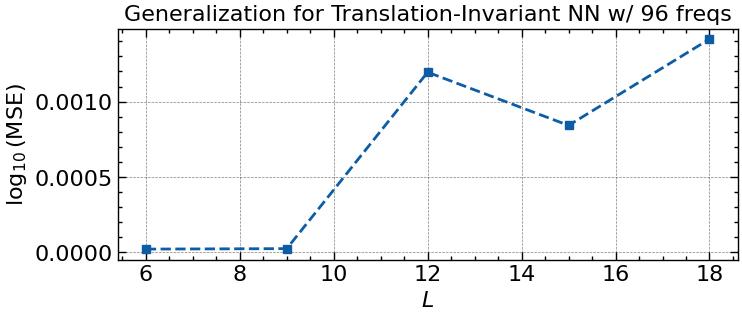

In [7]:
plt.figure(figsize=(8, 3))
plt.plot(dims, true_MSE, '--s')
plt.xlabel("$L$")
plt.ylabel(r'$\log_{10}(\text{MSE})$')
plt.title("Generalization for Translation-Invariant NN w/ 96 freqs")
plt.show()

In [1]:
def get_num_iterations(filenames):
    iterations = []
    for filename in filenames:
        with open(filename) as f:
            iteration_num = 0
            checking = False
            for line in f:
                # Check if "Iteration:" exists and extract the number
                match = re.search(r'Iteration:\s*(\d+)', line)
                if match:
                    checking = True
                    iteration_num = int(match.group(1))
                else:
                    if checking is True:
                        iterations.append(iteration_num)
                        print(f"Total number of iterations: {iteration_num}")
                        checking = False
                if len(iterations) == 1000:
                    break
    return iterations

In [2]:
def get_num_iterations_plane_waves(filenames, cutoff = None):
    iterations = []
    for filename in filenames:
        with open(filename) as f:
            iteration_num = 0
            for line in f:
                match = re.match(r"(\d+):", line)
                if match:
                    iteration_num = int(match.group(1))
                
                elif ("Chern number" in line) and (iteration_num > 1):
                    iterations.append(iteration_num)

                if cutoff is not None and len(iterations) == cutoff:
                    break
    return iterations

In [5]:
filename_18x18 = "/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_tMoTe2_2BPV_HF/tMoTe2_L_18/data/HF_2BPV_tMoTe2_FH_3.89deg_data_for_HF_L_18_index_1/slurm-6341221.out"

def get_info(ML_filename, original_filename = filename_18x18):
    ML_iters = get_num_iterations_plane_waves([ML_filename])
    iters = get_num_iterations_plane_waves([original_filename])
    print(f"\nData for {ML_filename}:")
    print(rf"Original No. of Iterations: {np.mean(iters):.2f} \\")
    print(rf"No. of Iterations with ML: {np.mean(ML_iters):.2f} \\")
    print(rf"Percent Reduction: {((np.abs(np.mean(iters) - np.mean(ML_iters)) / np.mean(iters)) * 100):.2f}\%")

# get_info("/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_tMoTe2_2BPV_HF/HF_2BPV_tMoTe2_FH_3.89deg_data_for_HF_L_18_6x6_9x9_test/slurm-6834540.out")
# get_info("/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_tMoTe2_2BPV_HF/HF_2BPV_tMoTe2_FH_3.89deg_data_for_HF_L_18_fourier_test/slurm-6822056.out")
# get_info("/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_tMoTe2_2BPV_HF/HF_2BPV_tMoTe2_FH_3.89deg_data_for_HF_L_18_freq_test_lc/slurm-6972264.out")
# get_info("/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_tMoTe2_2BPV_HF/HF_2BPV_tMoTe2_FH_3.89deg_data_for_HF_L_18_freq_test_learnableFF/slurm-6975514.out")
# get_info("/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_tMoTe2_2BPV_HF/HF_2BPV_tMoTe2_FH_3.89deg_data_for_HF_L_18_polynomial_test/slurm-6972253.out")
# get_info("/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_tMoTe2_2BPV_HF/HF_2BPV_tMoTe2_FH_3.89deg_data_for_HF_L_18_Q_NN_f_theta_1/slurm-6903224.out")
# get_info("/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_tMoTe2_2BPV_HF/HF_2BPV_tMoTe2_FH_3.89deg_data_for_HF_L_18_Q_NN_f_theta_3/slurm-6954461.out")
# get_info("/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_tMoTe2_2BPV_HF/HF_2BPV_tMoTe2_FH_3.89deg_data_for_HF_L_18_Q_NN_f_theta_4/slurm-6957187.out")
# get_info("/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_tMoTe2_2BPV_HF/HF_2BPV_tMoTe2_FH_3.89deg_data_for_HF_L_18_R_euclidean_test/slurm-6853908.out")

In [45]:
true_MSE = [
    0.01525291915563035342468955460761210835,   # 4096
    0.01531496005686377527179069046676161664,   # 2048
    0.00177556313369309451281058460651419617417947968675,   # 96
    0.0151749,  # 32
    0.0151745850148180861883598246543841629364601051274,    # 256
    0.015174474475920612405491342866156363497652626056,     # 512
    0.015174311183592326331162057433448413412550640097,      # 1024
]
iteration_steps = [12.27, 14.14, 24.80, 13.00, 9.00, 9.33, 9.00]
completed = [True, True, True, False, False, False, False]
num_freqs = [4096, 2048, 96, 32, 256, 512, 1024]

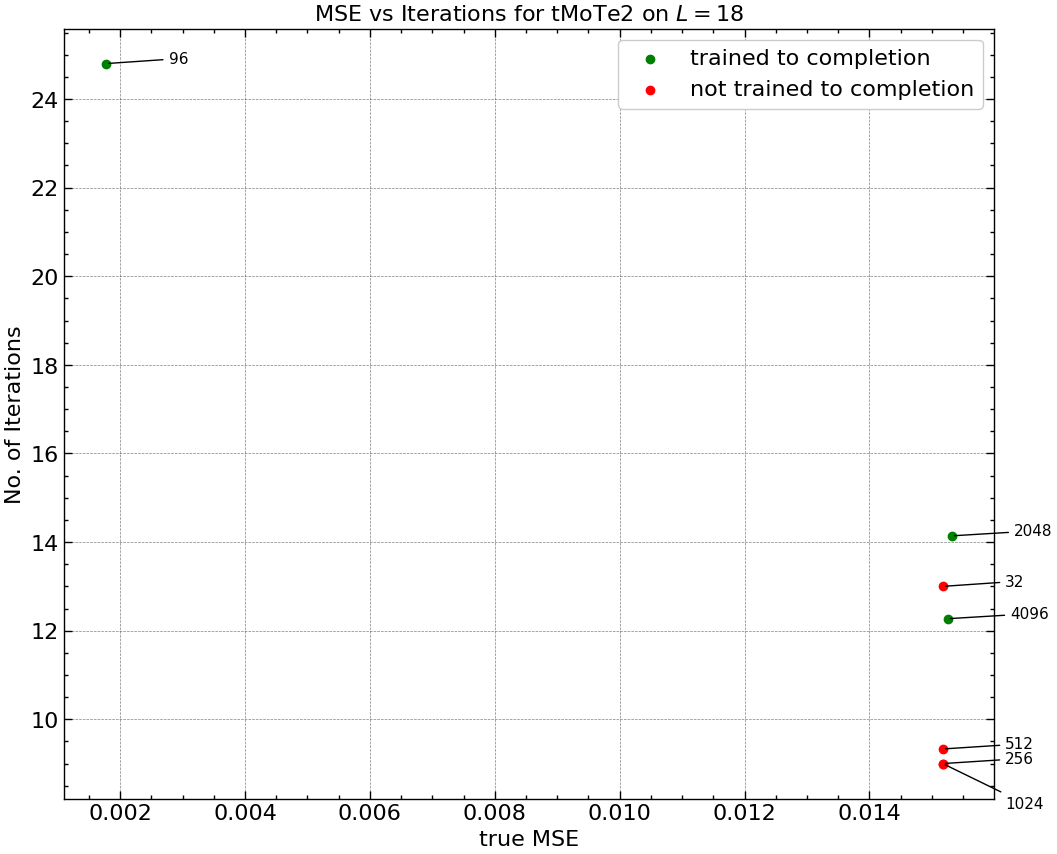

In [48]:
fig, ax = plt.subplots(figsize=(12, 10))

x_true = [true_MSE[i] for i in range(len(true_MSE)) if completed[i] is True]
y_true = [iteration_steps[i] for i in range(len(iteration_steps)) if completed[i] is True]
ax.scatter(x_true, y_true, color="green", label="trained to completion")

x_false = [true_MSE[i] for i in range(len(true_MSE)) if completed[i] is False]
y_false = [iteration_steps[i] for i in range(len(iteration_steps)) if completed[i] is False]
ax.scatter(x_false, y_false, color="red", label="not trained to completion")

# Add annotations to each data point
for i, txt in enumerate(num_freqs):
    if txt == 1024:
        position = (true_MSE[i] + 0.001, iteration_steps[i] - 1)
    else:
        position = (true_MSE[i] + 0.001, iteration_steps[i] + 0.01)
    ax.annotate(txt,
                (true_MSE[i], iteration_steps[i]),
                xytext=position, # Adjust xytext for label position
                arrowprops=dict(
                    arrowstyle='-',
                    color='black',
                    linewidth=1,
                ), # Add arrow
                fontsize=11)


ax.legend() # This will automatically use the labels provided in ax.scatter
plt.xlabel("true MSE")
plt.ylabel("No. of Iterations")
plt.title("MSE vs Iterations for tMoTe2 on $L=18$")
plt.show()

### Current

In [4]:
def get_num_iterations_trans_breaking(filenames, error_criterion = float('-inf')):
    iterations = []
    pattern = r"Iteration:\s*(\d+)\s+Error:\s*([0-9.eE+-]+)"
    for filename in filenames:
        with open(filename) as f:
            iteration_num = 0
            read = False
            for line in f:
                if (read is False):
                    if ("Start:" in line):
                        read = True
                else:
                    # extract iteration # & energy if exist
                    match = re.search(pattern, line)
                    if match:
                        iteration_num = int(match.group(1))
                        error = float(match.group(2))
                        # check if error is below error_criterion
                        if (error <= error_criterion) and (iteration_num > 1):
                            iterations.append(iteration_num)
                            iteration_num = 0
                            read = False
                    
                    elif ("End:" in line) and (iteration_num > 1):
                        iterations.append(iteration_num)
                        iteration_num = 0
                        read = False

                if ("does not have the section" in line):
                    break
    return iterations

In [5]:
def get_info_trans_breaking(ML_filenames, original_filenames, error_criterion = float('-inf')):
    ML_iters = get_num_iterations_trans_breaking(ML_filenames, error_criterion)
    iters = get_num_iterations_trans_breaking(original_filenames, error_criterion)
    # print(f"\nData for {ML_filenames[0]} and Co:")
    print(f"\nFor error_criterion={error_criterion}:")
    print(rf"Original No. of Iterations: {np.mean(iters):.2f} \\")
    print(rf"No. of Iterations with ML: {np.mean(ML_iters):.2f} \\")
    print(rf"Percent Reduction: {((np.abs(np.mean(iters) - np.mean(ML_iters)) / np.mean(iters)) * 100):.2f}\%")

In [25]:
U = 2
NN_type="SIREN"

base_dir = Path(f"/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_Hubbard_model_tunable_interaction_range_HF_For_ML_Trans_Breaking/U_{U}_ground_state/train_2e-5")

for L in range(10, 31, 2):
    print(f"For L={L}...")

    # find all folders for ML
    pattern = re.compile(rf"L_{L}_U_{U}_number_of_random_initials_(\d+)_occupied_{int((L**2)/2)}_{int((L**2)/2)}_{NN_type}_test")
    temp_foldernames = [p for p in base_dir.iterdir() if p.is_dir() and pattern.match(p.name)]

    # now find the single .log file inside
    ML_filenames = [list(foldername.glob("*.log"))[0] for foldername in temp_foldernames]

    # find all folders for regular
    pattern = re.compile(rf"L_{L}_U_{U}_number_of_random_initials_(\d+)_occupied_{int((L**2)/2)}_{int((L**2)/2)}__index_(\d+)_new")
    temp_foldernames = [p for p in base_dir.iterdir() if p.is_dir() and pattern.match(p.name)]

    # now find the single .log file inside
    orig_filenames = [list(foldername.glob("*.log"))[0] for foldername in temp_foldernames]

    get_info_trans_breaking(
        ML_filenames=ML_filenames,
        original_filenames=orig_filenames,
    )
    print()

For L=10...

For error_criterion=-inf:
Original No. of Iterations: 41.03 \\
No. of Iterations with ML: 7.00 \\
Percent Reduction: 82.94\%

For L=12...

For error_criterion=-inf:
Original No. of Iterations: 41.84 \\
No. of Iterations with ML: 7.00 \\
Percent Reduction: 83.27\%

For L=14...

For error_criterion=-inf:
Original No. of Iterations: 41.57 \\
No. of Iterations with ML: 7.00 \\
Percent Reduction: 83.16\%

For L=16...

For error_criterion=-inf:
Original No. of Iterations: 43.31 \\
No. of Iterations with ML: 7.00 \\
Percent Reduction: 83.84\%

For L=18...

For error_criterion=-inf:
Original No. of Iterations: 42.20 \\
No. of Iterations with ML: 7.00 \\
Percent Reduction: 83.41\%

For L=20...

For error_criterion=-inf:
Original No. of Iterations: 40.50 \\
No. of Iterations with ML: 3.00 \\
Percent Reduction: 92.59\%

For L=22...

For error_criterion=-inf:
Original No. of Iterations: 43.69 \\
No. of Iterations with ML: 6.00 \\
Percent Reduction: 86.27\%

For L=24...

For error_crit

In [7]:
# for old NN
for error_criterion in [5.3276814644842574e-05, 7.499388778653415e-05]:
    get_info_trans_breaking(
        ML_filenames = [
            "/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_Hubbard_model_tunable_interaction_range_HF_For_ML_Trans_Breaking/U_1_ground_state/L_18_U_1_number_of_random_initials_28_occupied_162_162_old_NN_diagonal_decomposition_num_freqs_64_errorc_5.3276814644842574e-05_test2/14284672.log"
        ],
        original_filenames = [
            "/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_Hubbard_model_tunable_interaction_range_HF_For_ML_Trans_Breaking/U_1_ground_state/L_18_U_1_number_of_random_initials_100_occupied_162_162__index_1_new/9336305.log"
        ],
        error_criterion = error_criterion
    )


For error_criterion=5.3276814644842574e-05:
Original No. of Iterations: 20.93 \\
No. of Iterations with ML: 3.21 \\
Percent Reduction: 84.64\%

For error_criterion=7.499388778653415e-05:
Original No. of Iterations: 19.63 \\
No. of Iterations with ML: 3.00 \\
Percent Reduction: 84.72\%


In [11]:
get_info_trans_breaking(
    ML_filenames=["/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_Hubbard_model_tunable_interaction_range_HF_For_ML_Trans_Breaking/U_1_ground_state/L_30_U_1_number_of_random_initials_48_occupied_450_450_old_NN_diagonal_decomposition_num_freqs_64/14297335.log"],
    original_filenames = ["/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_Hubbard_model_tunable_interaction_range_HF_For_ML_Trans_Breaking/U_1_ground_state/L_30_U_1_number_of_random_initials_100_occupied_450_450__index_1_new/14285737.log"],
    error_criterion=1.907336889761524e-05
)


For error_criterion=1.907336889761524e-05:
Original No. of Iterations: 33.77 \\
No. of Iterations with ML: 4.12 \\
Percent Reduction: 87.78\%


In [ ]:
print("for SIREN:")
for error_criterion in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]:
    get_info_trans_breaking(
        ML_filenames = [
            "/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_Hubbard_model_tunable_interaction_range_HF_For_ML_Trans_Breaking/U_1_ground_state/L_18_U_1_number_of_random_initials_1_occupied_162_162_SIREN_interpolation_from_8x8_sept1_keep/11524380.log"
        ],
        original_filenames = [
            "/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_Hubbard_model_tunable_interaction_range_HF_For_ML_Trans_Breaking/U_1_ground_state/L_18_U_1_number_of_random_initials_100_occupied_162_162__index_1_new/9336305.log"
        ],
        error_criterion = error_criterion
    )

In [13]:
def test(filenames):
    error_list = []
    pattern = r"Iteration:\s*(\d+)\s+Error:\s*([0-9.eE+-]+)"
    for filename in filenames:
        with open(filename) as f:
            iteration_num = 0
            read = False
            for line in f:
                if (read is False):
                    if ("Start:" in line):
                        read = True
                else:
                    # extract iteration # & energy if exist
                    match = re.search(pattern, line)
                    if match:
                        iteration_num = int(match.group(1))
                        error = float(match.group(2))
                        if iteration_num == 4:
                            error_list.append(error)
                            read = False
                    
                    elif ("End:" in line) and (iteration_num > 1):
                        read = False

                if ("does not have the section" in line):
                    break
    return error_list

print(max(test(["/blue/yujiabin/awwab.azam/hartree-fock-code/Julia_Hubbard_model_tunable_interaction_range_HF_For_ML_Trans_Breaking/U_1_ground_state/L_30_U_1_number_of_random_initials_48_occupied_450_450_old_NN_diagonal_decomposition_num_freqs_64/14297335.log"])))

1.907336889761524e-05


In [ ]:
# def binary_search(func, domain=(1e-7, 1e-3), tol=1e-12):
#     left = domain[0]
#     right = domain[1]
#     while(right - left > tol):
#         middle = (left + right) / 2
#         y_1 = func(left)
#         y_2 = func(right)
#         if y_1 < y_2:
#             right = middle
#         elif y_1 > y_2:
#             left = middle
#         else:
#             break
    
#     x = (left + right) / 2
#     print(left)
#     print(right)
#     y = func(x)
#     return {"error_c": x, "% reduction": y}

### For toy model

In [34]:
base_dir = Path(f"/blue/yujiabin/awwab.azam/hartree-fock-code/four_band_model_tunable_interaction_range/filling_1/Julia_4_band_model_tunable_interaction_range_HF_For_ML")

domain = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
percentages = []

for L in domain:
    print(f"For L={L}...")

    # find all folders for ML
    pattern = re.compile(rf"L_{L}_U_1_number_of_random_initials_(\d+)_filling_1_with_ML_error_1e-6.*")
    temp_foldernames = [p for p in base_dir.iterdir() if p.is_dir() and pattern.match(p.name)]

    # now find the single .log file inside
    ML_filenames = [list(foldername.glob("*.log"))[0] for foldername in temp_foldernames]
    # print(len(ML_filenames))

    # find all folders for regular
    pattern = re.compile(rf"^L_{L}_U_1_number_of_random_initials_(\d+)_filling_1(?:_index(\d+))?$")
    temp_foldernames = [p for p in base_dir.iterdir() if p.is_dir() and pattern.match(p.name)]

    # now find the single .log file inside
    orig_filenames = [list(foldername.glob("*.log"))[0] for foldername in temp_foldernames]
    # print(len(orig_filenames))

    # calculate % reduction
    ML_iters = get_num_iterations_trans_breaking(ML_filenames, float('-inf'))
    iters = get_num_iterations_trans_breaking(orig_filenames, float('-inf'))
    assert np.all(np.isfinite(ML_iters)) and np.all(np.isfinite(iters)), "Array contains NaN or Inf values!"
    percent_reduction = ((np.abs(np.mean(iters) - np.mean(ML_iters)) / np.mean(iters)) * 100)
    percentages.append(percent_reduction)

    # print output
    print(f"Original No. of Iterations: {np.mean(iters):.2f}")
    print(f"No. of Iterations w/ ML: {np.mean(ML_iters):.2f}")
    print(f"Percent Reduction: {percent_reduction:.2f}\n")

For L=10...
Original No. of Iterations: 97.62
No. of Iterations w/ ML: 5.63
Percent Reduction: 94.24

For L=12...
Original No. of Iterations: 96.31
No. of Iterations w/ ML: 7.00
Percent Reduction: 92.73

For L=14...
Original No. of Iterations: 96.58
No. of Iterations w/ ML: 7.00
Percent Reduction: 92.75

For L=16...
Original No. of Iterations: 96.29
No. of Iterations w/ ML: 7.00
Percent Reduction: 92.73

For L=18...
Original No. of Iterations: 96.31
No. of Iterations w/ ML: 7.35
Percent Reduction: 92.36

For L=20...
Original No. of Iterations: 96.32
No. of Iterations w/ ML: 7.96
Percent Reduction: 91.74

For L=22...
Original No. of Iterations: 96.28
No. of Iterations w/ ML: 8.00
Percent Reduction: 91.69

For L=24...
Original No. of Iterations: 96.27
No. of Iterations w/ ML: 8.00
Percent Reduction: 91.69

For L=26...
Original No. of Iterations: 96.23
No. of Iterations w/ ML: 8.00
Percent Reduction: 91.69

For L=28...
Original No. of Iterations: 96.29
No. of Iterations w/ ML: 8.00
Percen

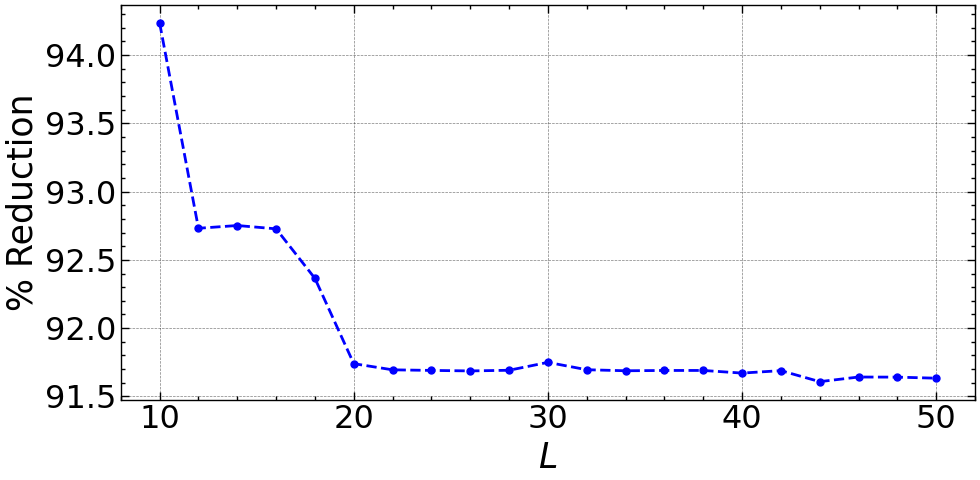

In [44]:
# plot it
domain = np.array(domain)
percentages = np.array(percentages)

plt.figure(figsize=(10, 5))
plt.xlabel(r"$L$", fontsize=25)
plt.ylabel("% Reduction", fontsize=25)
plt.tick_params(axis="both", which="major", labelsize=23)
plt.xticks([L for L in domain if L % 10 == 0])
plt.plot(domain, percentages, "--o", color="blue", ms=5)

plt.tight_layout()
plt.show()

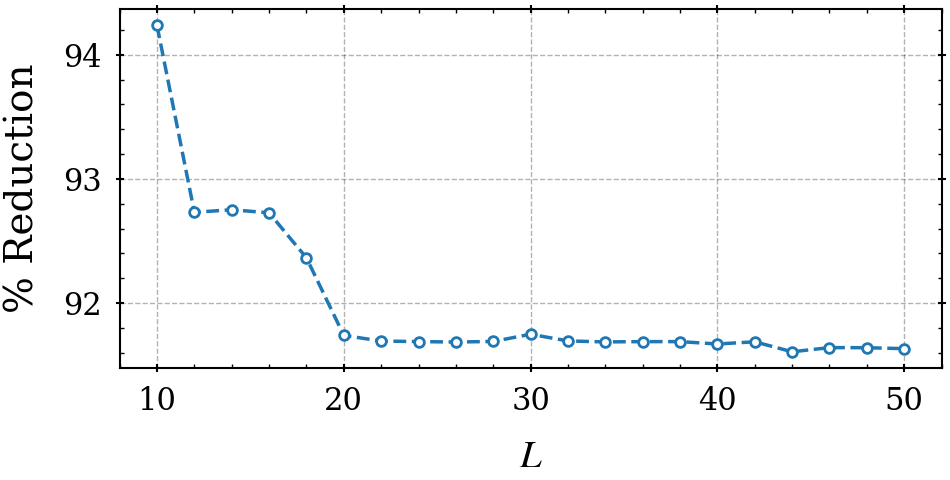

In [79]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "stix"
ax.axhline(0, color="gray", linewidth=1)
ax.axvline(10, color="gray", linestyle=":")

# Create the figure
plt.figure(figsize=(10, 5))
ax = plt.gca()

# Plot line with thicker width and subtle marker style
ax.plot(domain, percentages, "--o", color="#1f77b4", linewidth=2.5, markersize=7, markerfacecolor="white", markeredgewidth=2)

# Axis labels — control font size, weight, and padding (distance from axis)
ax.set_xlabel(r"$L$", fontsize=28, labelpad=15)
ax.set_ylabel("% Reduction", fontsize=28, labelpad=15, fontweight="normal")

# Ticks — set intervals, direction, and formatting
ax.set_xticks([L for L in domain if L % 10 == 0])
ax.tick_params(axis="both", which="major", labelsize=22, direction="inout", length=6, width=1.5, pad=10)

# Grid for readability
ax.grid(True, which="major", linestyle="--", linewidth=1, alpha=0.3)

# Make spines thicker and a bit more modern
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Tight layout for spacing
plt.tight_layout()
plt.show()